<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Преобразования-типов-данных" data-toc-modified-id="Преобразования-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразования типов данных</a></span></li><li><span><a href="#Устранение-неявных-дубликатов" data-toc-modified-id="Устранение-неявных-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Устранение неявных дубликатов</a></span></li><li><span><a href="#Устранение-аномалий" data-toc-modified-id="Устранение-аномалий-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Устранение аномалий</a></span></li></ul></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Гистограммы" data-toc-modified-id="Гистограммы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Гистограммы</a></span></li><li><span><a href="#Скорость-продажи-квартир" data-toc-modified-id="Скорость-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Скорость продажи квартир</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Средняя-цена-метра" data-toc-modified-id="Средняя-цена-метра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя цена метра</a></span></li><li><span><a href="#Удаляемся-от-центра:-цена-километра" data-toc-modified-id="Удаляемся-от-центра:-цена-километра-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Удаляемся от центра: цена километра</a></span></li></ul></li><li><span><a href="#Вывод-исследования" data-toc-modified-id="Вывод-исследования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод исследования</a></span></li></ul></div>

# Исследовательский анализ данных

<b> Введение </b>

    Нам даны архивные данные Яндекс.Недвижимости в виде датасета. В датасете - сведения о продажах недвижимости в Санкт-Петербурге и близлежащих населенных пунктах с 2014 по 2019 год. Наша задача - открыть и ознакомиться с таблицей, сделать предобработку ее данных и провести исследовательский анализ, пользуясь изученными на курсе инструментами для этого. Цель - определить факторы, влияющие на рыночную цену объекта, чтобы по ним обучить искусственный интеллект администрировать ресурс, выявляя подозрительные сделки из огромного множества сделок с недвижимостью.


## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    data=pd.read_csv('/Users/elena/Desktop/datasets/real_estate_data.csv',sep='\t')
except:
    data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
# Ознакомимся с названиями колонок:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [3]:
# Выясним, сколько строк и столбцов в датафрейме: 
display(data.shape)
rows_begin = data.shape


(23699, 22)

In [4]:
# Взглянем на общую информацию о таблице:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# Посмотрим общее распределение по всем столбцам: 
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Предварительно изучив типы данных в столбцах, можно сделать вывод, что наиболее странными являются:
- `is_apartment`, где по идее нужны булевы значения;
- `first_day_exposition`, где нужны дата и время, а не строка;
- есть столбцы с вещественными числами (этажи, балконы, пруды и парки), где могли быть целые. Не знаю, насколько это критично.

Затем посмотрим поближе на каждый из этих столбцов. Строим гистограмму


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

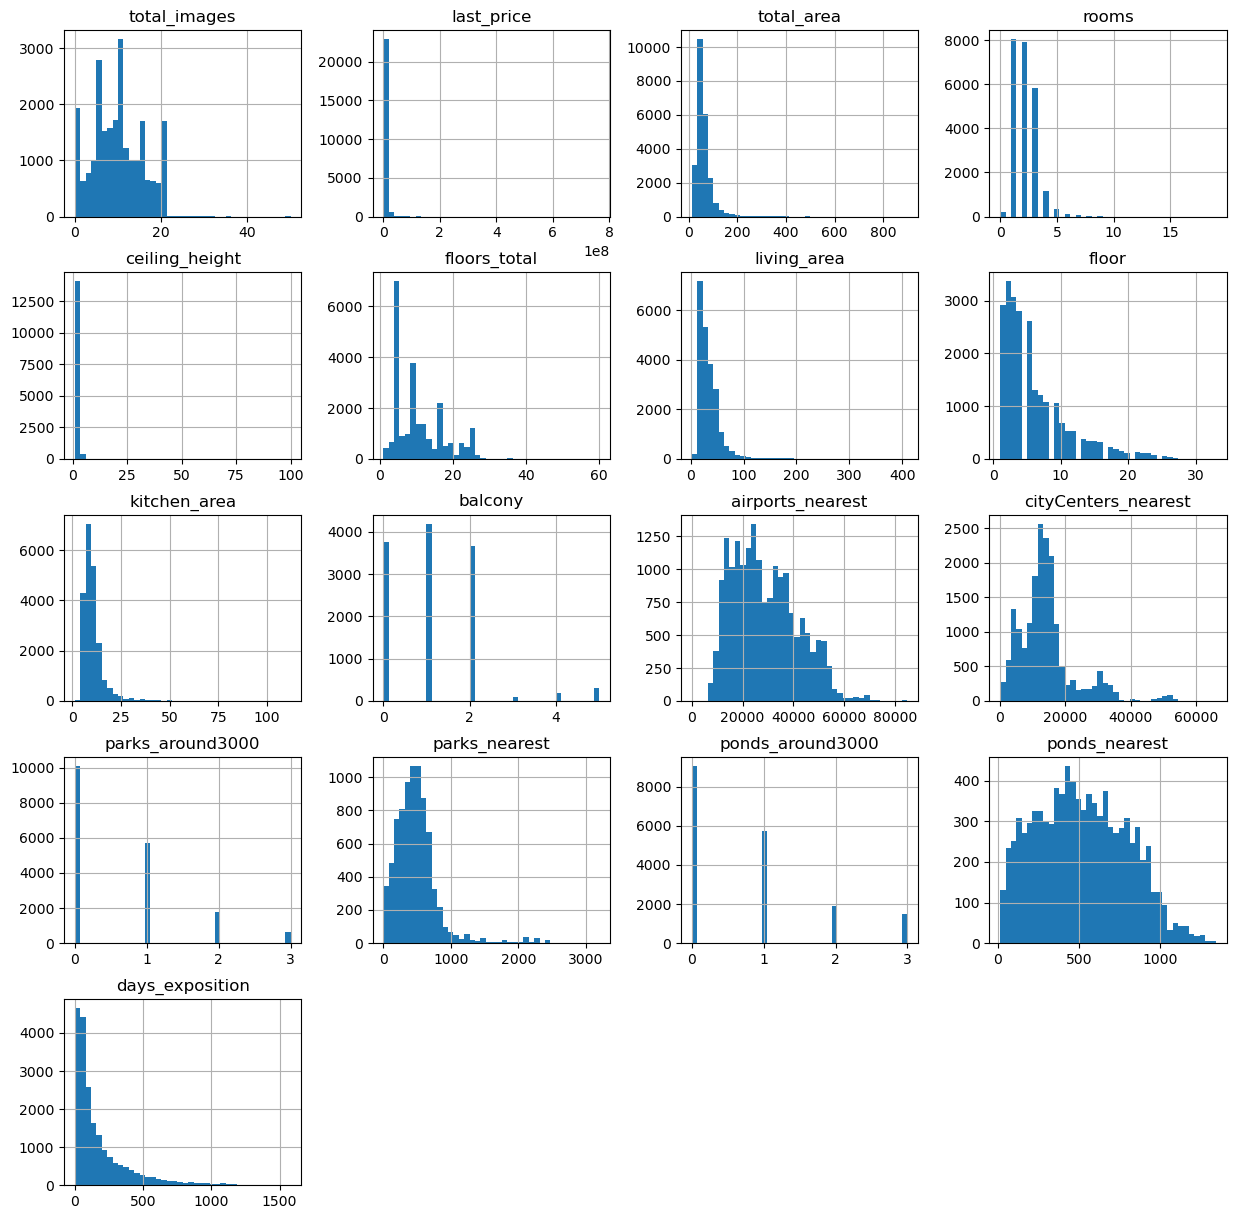

In [6]:
data.hist(bins=40,figsize=(15, 15))

Выводы: есть красивые кривые, без явных аномалий, кроме любви людей к круглым цифрам при отправке фото.Насколько можно судить по неоткалиброванным гистограммам, здесь все как обычно: продают квартиры с невысокими потолками, в пятиэтажках и девятиэтажках небольшой жилой площади с длинным хвостом более редких предложений.

Также мы видим, что с парками и прудами в спальных районах не очень. Но там, где они есть, их непременно указывают, если до них меньше километра. По продажам пик приходится на первые полгода, а затем кривая плавно, очень плавно спадает. Некоторые квартиры в продаже дольше, чем три года. Интересно, что с ними не так? 

In [7]:
display(data[data.duplicated()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


  При вызове метода info()  обаружились большие пропуски во многих столбцах. А вот явных дубликатов не нашлось, хотя это не значит, что дубликатов нет вообще. Возможны еще неявные.
    

## Предобработка данных

###  Заполнение пропусков
**Задание**

Найдите и изучите пропущенные значения в столбцах:

    - Определите, в каких столбцах есть пропуски.
    - Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
    - В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

In [8]:
#Выведем общее количество пропусков по столбцам:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы видим много пропусков в нижней части списка. Там столбцы, связанные с картографическими данными. В верхней части, где пользовательские данные, пропуски есть только в нескольких столбцах, но глобальные. Сделаем более удобный для сравнения величин вариант сортировки:

In [9]:
data.isna().sum().sort_values(ascending=False)


is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Мы видим 14 столбцов с пропусками, в четырех из них (все картографические данные) близкие значения (около 5500). Возможно, они связаны.
Начнем с количественных данных. Пропуски в количественных данных заполняют одним числовым значением для столбца - средним или медианой. Это столбцы: ceiling_height, kitchen_area, living_area, floors_total.

In [10]:
# Для начала исправим название одного CamelCase столбца:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})


Столбец `ceiling_height` - высота потолков - изучим уникальные значения столбца:

In [11]:
data['ceiling_height'].unique()


array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      


У нас есть целочисленные большие значения - явные аномалии. Также есть очень малые величины - оставим этот столбец в покое до момента, когда удалим аномалии.

Площадь кухни - нежилая, в сумме с жилой пложадью и коридорами-балконами-санузлами-кладовками должна давать общую площадь. Однако данных по нежилой площади у нас нет. Поэтому мы можем попробовать заполнить пропущенные значения жилой площади с помощью произведения имеющихся значений `total_area` и коэффициента, который представляет собой отношение жилой площади к площади всей квартиры. Это не будет точным значением, но приближенным настолько, насколько возможно без данных о другой нежилой площади. В дальнейшем заполним пропуски в кухонной площади с помощь разницы общей и жилой площади. Но для начала надо убедиться, что такое заполнение будет корректно, то есть что величины площадей коррелируют между собой.


Найдем корреляцию между площадью кухни и общей; между жилой и общей площадью:

In [12]:
corr_kitchen = data['total_area'].corr(data['kitchen_area'])
display('Коэффициент корреляции кухонь и общей площади = ', corr_kitchen)
corr_living = data['total_area'].corr(data['living_area'])
display('Коэффициент корреляции жилой и общей площади = ', corr_living)


'Коэффициент корреляции кухонь и общей площади = '

0.6091211711198313

'Коэффициент корреляции жилой и общей площади = '

0.9395373338721501

Итак, положительная корреляция в обоих случаях есть, а в случае с жилой площадью корреляция очень высокая. Значит, заполняем смело:

In [13]:
ratio_living = (data['living_area'] / data['total_area']).median()
display(ratio_living)

0.5678598992678503

In [15]:
data['living_area'] = data['living_area'].fillna((data['total_area'] * ratio_living))
data['living_area'].isna().sum()


0

Теперь очередь за кухнями:

In [16]:
data['living_area'].isna().sum()


0

In [17]:
data['kitchen_area'] = data['kitchen_area'].fillna((data['total_area'] -data['living_area']))
data['kitchen_area'].isna().sum()


0

Осталось проверить корректность заполнения: если сумма жилой и кухонь <= общей площади, то все ок.

In [18]:
uncorrect_area = data.query('total_area < (living_area + kitchen_area)')
display(len(uncorrect_area))
display(uncorrect_area.head(10))

73

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
1060,10,5200000.0,50.00,2015-11-06T00:00:00,2,NaN,35.0,39.00,15,False,...,20.50,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0
1155,11,7000000.0,38.00,2019-04-09T00:00:00,1,3.20,5.0,33.00,1,NaN,...,12.00,NaN,Санкт-Петербург,31501.0,3670.0,1.0,183.0,3.0,689.0,NaN
1354,14,7300000.0,54.50,2018-08-20T00:00:00,2,NaN,16.0,38.00,12,NaN,...,19.00,2.0,Санкт-Петербург,51030.0,14721.0,0.0,NaN,0.0,NaN,NaN
1407,9,3250000.0,24.60,2018-06-29T00:00:00,1,NaN,25.0,18.00,16,NaN,...,18.20,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,96.0
1854,3,6540000.0,60.20,2018-10-14T00:00:00,2,NaN,24.0,55.00,24,NaN,...,14.84,NaN,Санкт-Петербург,33606.0,14769.0,0.0,NaN,0.0,NaN,60.0


При дальнейшем заполнении выяснилось, что есть 73 строки, которые заполнились некорректно - значение общей площади меньше суммы площадей кухни и жилой. Число небольшое, можно исключить капризные строчки из данных.

In [19]:
data = data.query('total_area >= (living_area + kitchen_area)')
data.shape


(23626, 22)

Удалилось 73 строки. Посмотрим, все ли в порядке с данными:

In [20]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,90.289724,9,NaN,...,68.710276,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.400000,5,NaN,...,9.100000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.600000,6,NaN,...,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,40.658769,22,NaN,...,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.430000,26,NaN,...,8.810000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,NaN,...,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0



Получилось. Теперь очередь очередь этажности домов. Пропусков немного - 86, поэтому мы можем их удалить. Так же поступим с пропущенными 49 значениями locality_name. Загадка, как эти квартиры удалось продать, без адреса-то.



In [21]:
data = data.dropna(subset=['locality_name','floors_total'])
display(data['locality_name'].isna().sum())
display(data['floors_total'].isna().sum())

0

0

In [22]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Обратимся к категориальным по сути столбцам с пропусками. Это 'is_apartment', 'balcony'. Каждый из них предполагает ответ да/нет. Так как люди склонны не заполнять необязательные поля, которые к ним не относятся, то можно  пропуски расценивать как 'нет'. Значит, можно заполнить нулями. С другой стороны, у нас есть столбцы пропусками в картографических данных, которые тоже по сути категориальны. Это 'parks_around3000','ponds_around3000'. Если программа не нашла прудов и парков в радиусе 3 км, значит, скорее всего, их там нет. Заполним их нулями.

У нас с площадью будут как-то коррелировать количество комнат и студии, можно посмотреть, какая медиана и среднее у основных значений там и использовать медиану для заполнения неподдающихся пропусков. 


In [23]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'].isna().sum()


0

In [24]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()


0

In [25]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isna().sum()


0

In [26]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].isna().sum()


0

Расстояние до аэропортов и до центра трогать не будем во избежание искажений частотности.

Посмотрим, что осталось. Оставшиеся столбцы совсем непонятно, как заполнять. Значат ли пропуски, что квартиры далеко от парков и прудов, или нет? Мы не можем их заполнить, так как они связаны со столбцами `parks_around3000 ` и `ponds_around3000`. Медиана такова, что при заполнении пропусков ею у нас одни столбцы могут противоречить другим.  Оставим все без изменений. Также можно сделать запрос коллегам по поводу этих пропусков. Столбец `days_exposition` оставим без заполнения, так как он нам понадобится в неискаженном виде в предстоящем анализе.

In [27]:
data.isna().sum().sort_values(ascending=False)


parks_nearest           15484
ponds_nearest           14479
ceiling_height           9057
airports_nearest         5501
city_centers_nearest     5478
days_exposition          3160
kitchen_area                0
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

В целом, если говорить о причинах пропусков, можно выделить основные возможные причины:
- люди не склонны заполнять все поля формы, особенно если эти поля к ним не относятся или они затрудняются их заполнить точно;
- банальная рассеянность - некоторые пропустили существенные для продажи параметры, такие как адрес, общая жилая площадь, этажность дома;
- несовершенство программ картографического толка, возможно, они не со всеми населенными пунктами работают корректно, или технический фактор - потеря при переносе данных.

### Преобразования типов данных
**Задача.**
Рассмотрите типы данных в каждом столбце:

    - Найдите столбцы, в которых нужно изменить тип данных;
    - Преобразуйте тип данных в выбранных столбцах;
    - В ячейке с типом markdown поясните, почему нужно изменить тип данных.

In [28]:
data.dtypes


total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Нам требуется преобразовать столбцы:
- `is_apartment`из строки в булевы значения;
- `first_day_exposition` из строки в значения типа datetime;
- `balcony`, `floors_total`, `last_price` и другие количественные столбцы - из вещественного в целое число. 



In [29]:
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')


In [30]:
data['last_price'] = data['last_price'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')


In [31]:
display(data['first_day_exposition'].head(20))


0     2019-03-07T00:00:00
1     2018-12-04T00:00:00
2     2015-08-20T00:00:00
3     2015-07-24T00:00:00
4     2018-06-19T00:00:00
5     2018-09-10T00:00:00
6     2017-11-02T00:00:00
7     2019-04-18T00:00:00
8     2018-05-23T00:00:00
9     2017-02-26T00:00:00
10    2017-11-16T00:00:00
11    2018-08-27T00:00:00
12    2016-06-30T00:00:00
13    2017-07-01T00:00:00
14    2016-06-23T00:00:00
15    2017-11-18T00:00:00
16    2017-11-23T00:00:00
17    2016-09-09T00:00:00
18    2017-01-27T00:00:00
19    2019-01-09T00:00:00
Name: first_day_exposition, dtype: object

Посмотрев на порядок чисел в дате, мы видим, что указана только дата в формате год-месяц-день. Все видимое время-полночь, значение по умолчанию, значит, время можно опустить для лучшей читаемости человеком.

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')


In [33]:
display(data['first_day_exposition'].head(10))


0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

Тип данных столбца изменился. Проверим теперь всю проделанную работу, вызвав повторно метод .dtypes:

In [34]:
data.dtypes


total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Подведем итоги:
- `is_apartment`мы преобразовали из строки в булевы значения так как там предпологается ответ да/нет;
- `first_day_exposition` из строки в значения типа datetime, так как это дата;
- `balcony`, `last_price`,`parks_around3000`,`ponds_around3000`, `floors_total` из вещественного в целое число, потому что половины балкона или пруда не существует. 

### Устранение неявных дубликатов
**Задача**:

Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [35]:
#Посмотрим, какие уникальные значения есть в столбце:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [36]:
#При попытках справиться с заданием вылезала ошибка, наводящая на мысль о вещественных числах где-то в столбце,
#поэтому заменим тип на string:
data['locality_name'] = data['locality_name'].astype('str')


Заменим излишне подробные названия на лаконичные через метод replace():

In [37]:
data['locality_name'] = data['locality_name'].str.replace('ё','е', regex=True)


In [38]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')


In [39]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')


In [40]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')


In [41]:
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок')


In [42]:
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок')


In [43]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')


Посмотрим результат замен, снова вызвав метод unique():

In [44]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Также создадим отдельный столбец только для локаций без приставок для возможных будущих нужд исследования:

In [45]:
data['locality_only'] = data['locality_name']
data['locality_only'] = data['locality_only'].str.replace('поселок','')
data['locality_only'] = data['locality_only'].str.replace('город','')
data['locality_only'] = data['locality_only'].str.replace('деревня','')
data['locality_only'] = data['locality_only'].str.replace('село','')
data['locality_only'] = data['locality_only'].str.replace('садовое товарищество','')



In [46]:
display(data['locality_only'])
display(data['locality_only'].unique())
data.columns



0        Санкт-Петербург
1                 Шушары
2        Санкт-Петербург
3        Санкт-Петербург
4        Санкт-Петербург
              ...       
23694    Санкт-Петербург
23695              Тосно
23696        Рождествено
23697    Санкт-Петербург
23698        Новый Учхоз
Name: locality_only, Length: 23492, dtype: object

array(['Санкт-Петербург', ' Шушары', ' Янино-1', ' Парголово', ' Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', ' Кудрово',
       'Коммунар', 'Колпино', ' Красный Бор', 'Гатчина', ' Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', ' Новое Девяткино',
       ' Металлострой', ' Лебяжье', ' Сиверский', ' Молодцово',
       ' Кузьмоловский', ' Новая Ропша', 'Павловск', ' Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       ' Куттузи', ' Аннино', ' Ефимовский', ' Плодовое', ' Заклинье',
       ' Торковичи', ' Первомайское', 'Красное Село', ' Понтонный',
       'Сясьстрой', ' Старая', ' Лесколово', ' Новый Свет', 'Сланцы',
       ' Путилово', 'Иван', 'Мурино', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', ' Оржицы', ' Кальтино', 'Кудрово',
       ' Романовка', ' Бугры', ' Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', ' Павлово', ' Оредеж', ' Копорье', ' Молодежное',
       'Тихвин', ' Победа', ' Ну

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'locality_only'],
      dtype='object')

Вроде все корректно, можем продолжать предобработку.

### Устранение аномалий
**Задача:**

Найдите и устраните редкие и выбивающиеся значения. Например, в столбце `ceiling_height` может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.

    Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
    В противном случае удалите редкие и выбивающиеся значения.
    В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.

In [47]:
display('Высокие:', data[data['ceiling_height']>6.0]['ceiling_height'].count())
display('Низкие:', data[data['ceiling_height']<2.2]['ceiling_height'].count())
sorted(data['ceiling_height'].unique())


'Высокие:'

27

'Низкие:'

14

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


Осталось, согласно примеру в задании, перевести значения высоких потолков в вещественные числа, разделив на 10. Мы видим, что осталось аномалий не так много, значит, их удаление не сильно повредит данным. Удаляем, совместив два условия и проверяем:


In [48]:
data.loc[data['ceiling_height']>=20, 'ceiling_height']=data['ceiling_height']/10
sorted(data['ceiling_height'].unique())


[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.2600000000000002,
 2.7,
 nan,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,

In [49]:
data = data.drop(data[(data['ceiling_height']>6.0)|(data['ceiling_height']<2.2)].index)


In [50]:
display('Высокие:', data[data['ceiling_height']>6.0]['ceiling_height'].count())
display('Низкие:', data[data['ceiling_height']<2.2]['ceiling_height'].count())


'Высокие:'

0

'Низкие:'

0

Займемся пропусками в высоте потолков:


In [51]:
display('Количество пропусков:',data['ceiling_height'].isna().sum())
display('Медиана и среднее:',data['ceiling_height'].median(), data['ceiling_height'].mean())


'Количество пропусков:'

9057

'Медиана и среднее:'

2.65

2.726800111010838

Пропусков слишком много для заполнения по среднему или медиане, будет искажение. Придется оставить как есть.


In [52]:
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23470.000000,2.347000e+04,23470.000000,23470.000000,14413.000000,23470.000000,23470.000000,23470.000000,23470.000000,23470.000000,17979.000000,18002.000000,23470.000000,8001.000000,23470.000000,9006.000000,20314.000000
mean,9.879591,6.543927e+06,60.365435,2.072135,2.726800,10.669280,34.566371,5.871836,11.779976,0.592331,28798.824351,14194.237696,0.468854,490.784152,0.589859,518.262492,180.862558
std,5.679743,1.092760e+07,35.702555,1.079460,0.277717,6.589537,22.381009,4.867692,8.781444,0.959565,12635.057218,8618.379054,0.748220,341.248070,0.883421,277.902538,219.871098
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.409250e+06,40.000000,1.000000,2.510000,5.000000,19.000000,2.000000,7.200000,0.000000,18573.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.800000,0.000000,26756.000000,13094.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.787500,3.000000,2.800000,16.000000,42.100000,8.000000,13.000000,1.000000,37276.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,6.000000,60.000000,409.700000,33.000000,230.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрев статистику по столбцам, обратим внимание на стандартное отклонение: где оно больше, там, скорее всего, есть аномалии Наибольшие значения отклонения по столбцам: total_area, living_area, и вполне объяснимые гигантские разрывы в airports_nearest и cityCenters_nearest. Объяснимы они потому, что это расстояние в метрах. Есть отклонения в числе картинок, но нас они не интересуют. Займемся площадью. 

Изучаем в комплексе границы значений площади. Посчитаем аномалией площадь кухни меньше 5 кв.метров, общую площадь <28 кв.м. Жилая площадь на человека считается нормой от 18 кв.м.  Цифры взяты из действующих норм жилищного законодательства.

In [53]:
display(data['kitchen_area'].min())
display(data['kitchen_area'].max())
display(data['living_area'].min())
display(data['living_area'].max())
display(data['total_area'].min())
display(data['total_area'].max())


0.0

230.0

2.0

409.7

12.0

900.0

In [54]:
display('kitchen:', data[data['kitchen_area']<5.0]['kitchen_area'].count())
display('living:', data[data['living_area']<18.0]['living_area'].count())
display('total:', data[data['total_area']<28.0]['total_area'].count())


'kitchen:'

150

'living:'

4233

'total:'

377

Видим, что есть много квартир с площадью, сильно отступающей от каких-либо норм. Что ж, как и следовало ожидать, придется снизить планку. Посмотрим в графике маленькие объекты, затем большие:

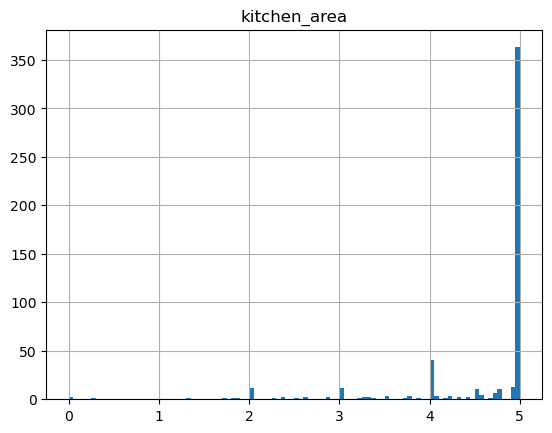

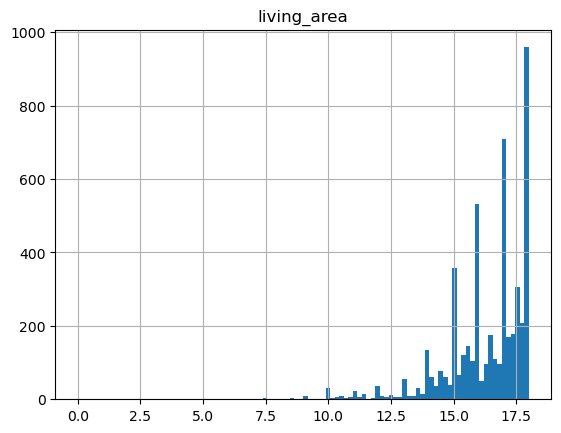

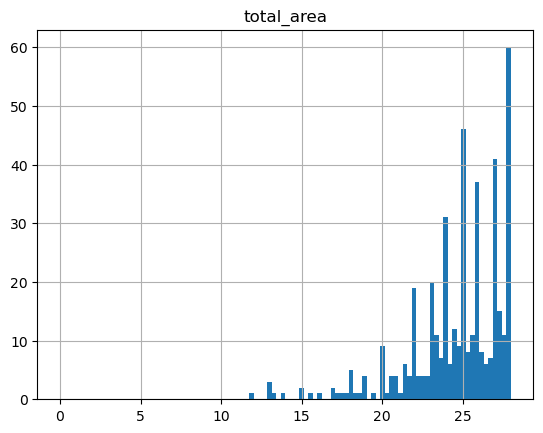

In [55]:
data.hist('kitchen_area', bins=100, range=(0,5))
plt.show()
data.hist('living_area', bins=100, range=(0,18))
plt.show()
data.hist('total_area', bins=100, range=(0,28))
plt.show()


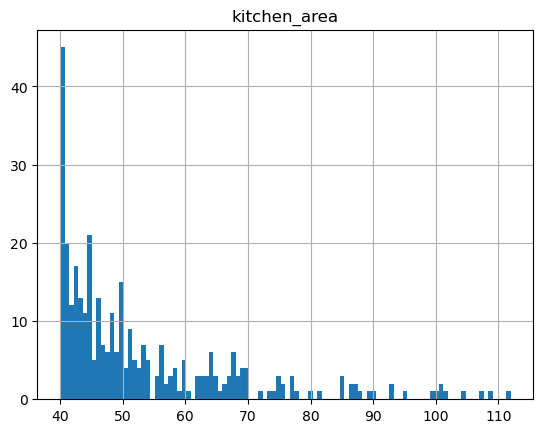

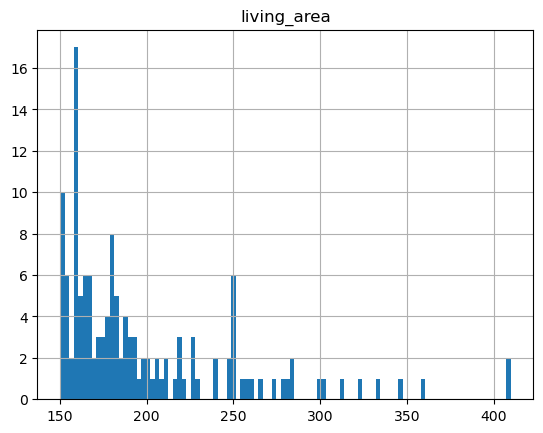

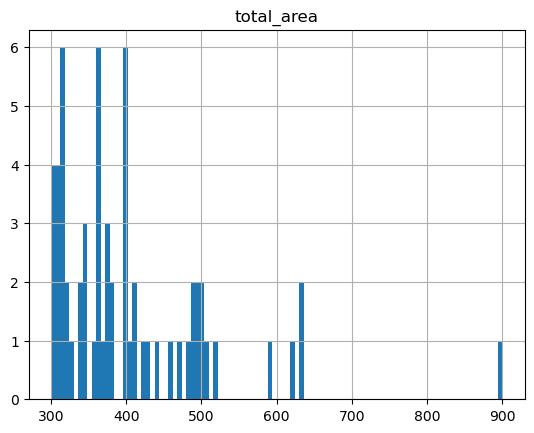

In [56]:
data.hist('kitchen_area', bins=100, range=(40,112))
plt.show()
data.hist('living_area', bins=100, range=(150,410))
plt.show()
data.hist('total_area', bins=100, range=(300,900))
plt.show()

Стало понятнее, какие значения засоряют данные, а какие все же не стоит удалять:
- кухни срезаем по 4.8 кв.м;
- жилую площадь по 14.5 кв.м;
- общую площадь по 22 кв.м.

Проделываем то же с большими помещениями, отберем значения, которые выглядят как выбросы и единичные случаи:
- кухни - оставляем до 45 кв.м;
- жилая площадь - до 200 кв.м;
- общая площадь - свыше 400 кв.м.

In [57]:
#Удаляем аномалии в столбцах с площадью.
data = data.drop(data[(data['kitchen_area']>45.0)|(data['kitchen_area']<4.8)].index)
data = data.drop(data[(data['living_area']>200)|(data['living_area']<14.5)].index)
data = data.drop(data[(data['total_area']>400)|(data['total_area']<22)].index)


Проверяем результат, повторно вызвав метод describe. 
Вывод: мы обработали аномалии в данных, которые заполняет пользователь. Это площадь кухни, жилая и общая площадь, а также высота потолков. В данных были странные значения, возможно, опечатки.
Картографические данные не трогаем. 

In [58]:
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22524.000000,2.252400e+04,22524.000000,22524.000000,13935.000000,22524.000000,22524.000000,22524.000000,22524.000000,22524.000000,17275.000000,17295.000000,22524.000000,7680.000000,22524.000000,8598.000000,19485.000000
mean,9.909563,6.219458e+06,59.631223,2.081069,2.721773,10.596386,34.344350,5.835553,11.260503,0.596386,28785.958495,14243.390633,0.467635,490.142578,0.585509,519.303326,180.901103
std,5.681074,7.322446e+06,29.993648,1.036088,0.269581,6.526214,19.352023,4.828658,6.180524,0.963429,12621.708618,8601.901264,0.746089,339.691971,0.880063,277.526893,219.335854
min,0.000000,1.219000e+04,22.000000,0.000000,2.250000,1.000000,14.500000,1.000000,4.800000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.473876e+06,41.000000,1.000000,2.500000,5.000000,19.400000,2.000000,7.200000,0.000000,18522.000000,9403.000000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,10.000000,4.650000e+06,52.500000,2.000000,2.650000,9.000000,30.100000,4.000000,9.700000,0.000000,26786.000000,13114.000000,0.000000,455.000000,0.000000,504.000000,96.000000
75%,14.000000,6.750000e+06,69.700000,3.000000,2.800000,15.000000,42.100000,8.000000,12.807500,1.000000,37284.000000,16275.000000,1.000000,612.000000,1.000000,732.000000,232.000000
max,50.000000,3.300000e+08,398.000000,16.000000,6.000000,60.000000,200.000000,33.000000,45.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


    Для проверки корректности удаления пропусков и аномалий, посмотрим, какой процент данных остался:
    

In [59]:
display('Было:', rows_begin)
display('Стало:', data.shape)


'Было:'

(23699, 22)

'Стало:'

(22524, 23)

Удалили 1175 строк, это 5%. Не так много.

## Добавление новых столбцов
Добавьте в таблицу новые столбцы со следующими параметрами:

    цена одного квадратного метра;
    день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    месяц публикации объявления;
    год публикации объявления;
    тип этажа квартиры (значения — «‎первый», «последний», «другой»);
    расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [60]:
data['price_for_one'] = data['last_price']/data['total_area']
data['price_for_one'] = data['price_for_one'].round()


In [61]:
data['weekday'] = data['first_day_exposition'].dt.weekday


In [62]:
data['month'] = data['first_day_exposition'].dt.month


In [63]:
data['year'] = data['first_day_exposition'].dt.year


In [64]:
def categorize_floors(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(categorize_floors,axis=1)



In [65]:
data['city_сenters_nearest_km'] = data['city_centers_nearest']/1000
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].round()



Проверяем результат - должны появиться новые столбцы, в них должны быть нормальные значения:

In [66]:
data.columns


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'locality_only', 'price_for_one',
       'weekday', 'month', 'year', 'type_floor', 'city_сenters_nearest_km'],
      dtype='object')

In [67]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_only,price_for_one,weekday,month,year,type_floor,city_сenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,Санкт-Петербург,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,81.0,Шушары,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2,574.0,558.0,Санкт-Петербург,92786.0,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121.0,Санкт-Петербург,100000.0,1,6,2018,другой,8.0
7,5,7915000,71.6,2019-04-18,2,NaN,24,40.658769,22,False,...,0,NaN,NaN,Санкт-Петербург,110545.0,3,4,2019,другой,12.0


## Исследовательский анализ данных
### Гистограммы
Изучите следующие параметры объектов:

    общая площадь;
    жилая площадь;
    площадь кухни;
    цена объекта;
    количество комнат;
    высота потолков;
    этаж квартиры;
    тип этажа квартиры («первый», «последний», «другой»);
    общее количество этажей в доме;
    расстояние до центра города в метрах;
    расстояние до ближайшего аэропорта;
    расстояние до ближайшего парка;
    день и месяц публикации объявления.
    Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

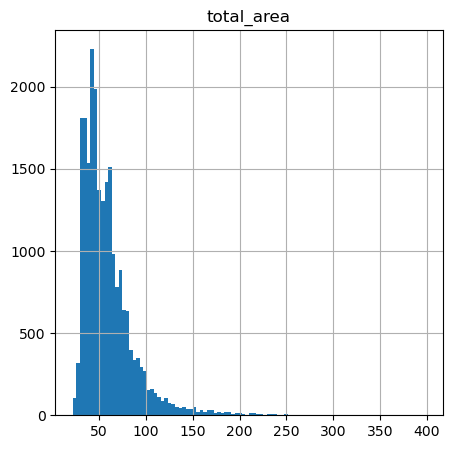

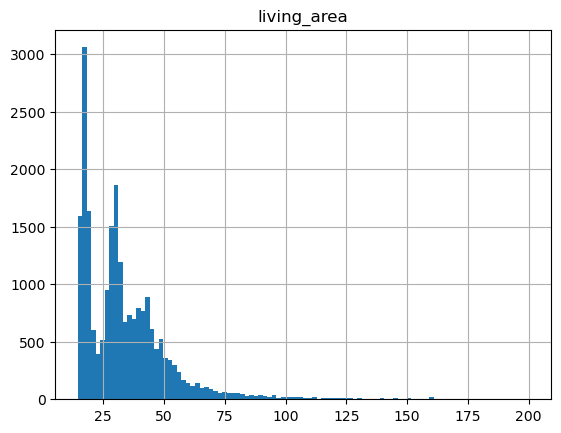

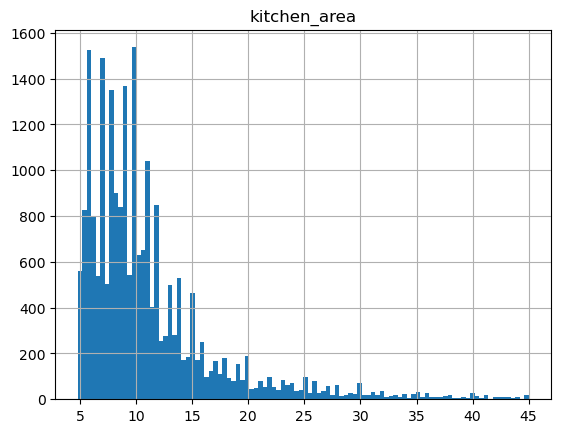

In [68]:
data.hist('total_area', bins = 100, figsize=(5,5))
data.hist('living_area', bins=100)
data.hist('kitchen_area' ,bins=100)


In [69]:
#Посмотрим среднее и медиану:
display(data['total_area'].median())
display(data['living_area'].median())
display(data['kitchen_area'].median())
display(data['total_area'].mean())
display(data['living_area'].mean())
display(data['kitchen_area'].mean())

52.5

30.1

9.7

59.63122269579101

34.344350216595195

11.260502510167715

На гистограммах общей и жилой площади мы отчетливо видим пики однушек/студий, двушек и трешек.
Максимум предложений с общей площадью до 70 кв.м и жилой до 35. Трехкомнатных квартир традиционно меньше на рынке. Есть длинный шлейф отдельных предложений с гораздо большей площадью.
На гистограмме с кухнями  у нас один главный пик - около 9 кв.м. Есть еще несколько пиков поменьше в пределах площади 10 метров - это совсем маленькие варианты отдельных кухонь и кухонь-ниш.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

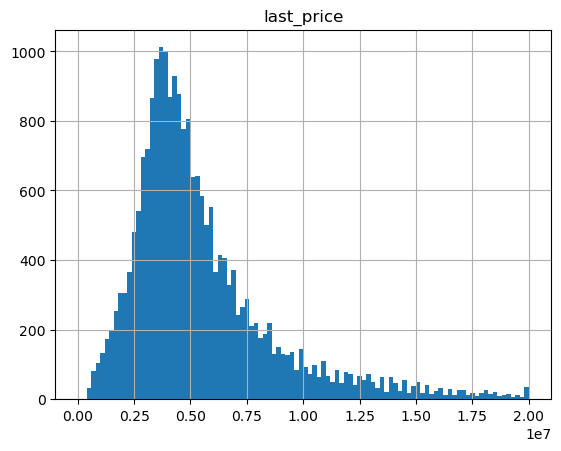

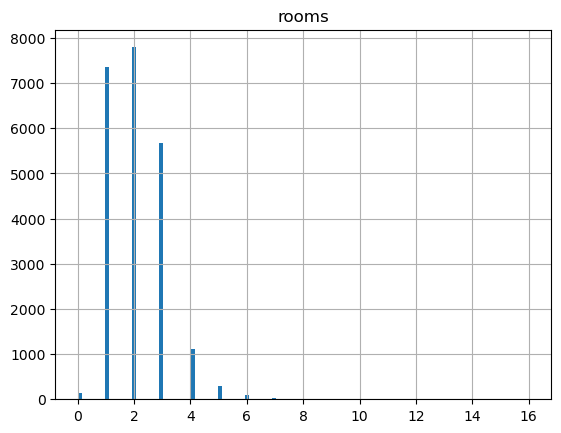

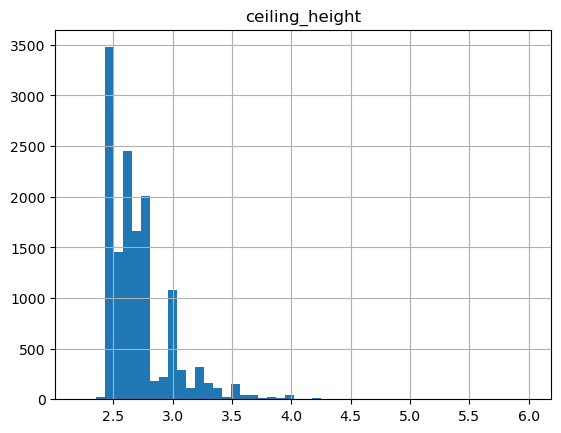

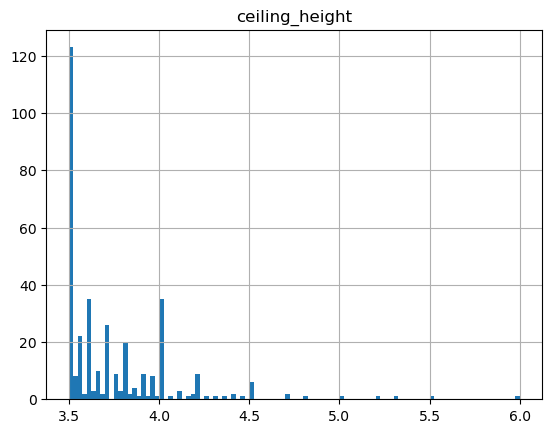

In [70]:
data.hist('last_price',bins=100, range=(0,20000000))
data.hist('rooms', bins=100)
data.hist('ceiling_height', bins=50, range=(2.2,6))
data.hist('ceiling_height', bins=100, range=(3.5,6))



In [71]:

display(data['last_price'].median())
display(data['rooms'].median())
display(data['ceiling_height'].median())


4650000.0

2.0

2.65

In [72]:
display(data['last_price'].mean())
display(data['rooms'].mean())
display(data['ceiling_height'].mean())


6219458.376931273

2.0810690818682294

2.7217725152493246

Гистограммы близки нормальному распределению, цены заметно скошены вправо, в сторону больших значений. Там хвост гораздо больше, но тогда не видно хорошо, куда приходится пик, поэтому пришлось обрубить на 20 млн.
В ценах наиболее частотные предложения находятся в интервале 3-5 млн, но много предложений и от 2 до 7. 
Гистограмма с комнатами подтверждает наши предположения в предыдущей ячейке о том что три пика в total_area - это по числу комнат. Наиболее популярны двушки, их догоняют однушки.
Потолки имеют явный пик естественного происхождения(мы не заполняли пропуски) - на уровне около 2.5 метров, но есть несколько других популярных высот, поэтому медиана и среднее несколько выше. Высоких потолков сравнительно немного, хотя частотность в тысячах преуменьшает ситуацию, поэтому я построила еще одну гистограмму по высоким потолкам от 3.5 метров. На ней видно, что, действительно, предложений мало.


<AxesSubplot:>

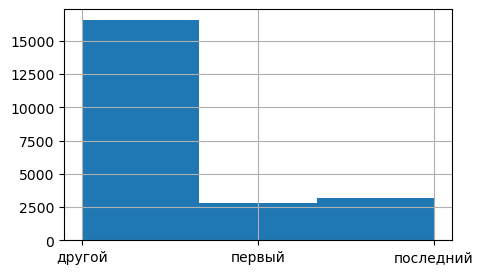

In [73]:
data['type_floor'].unique()
data['type_floor'].hist(bins=3, figsize=(5,3))


array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

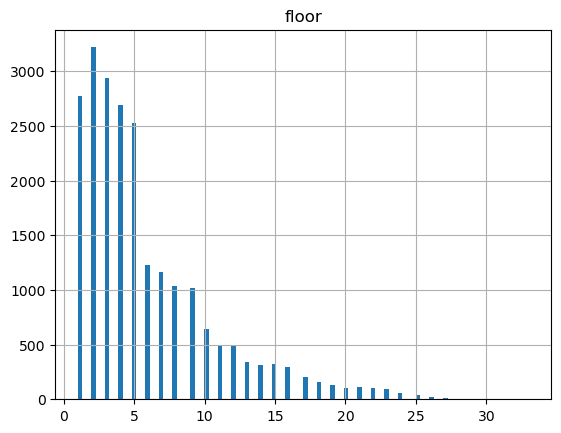

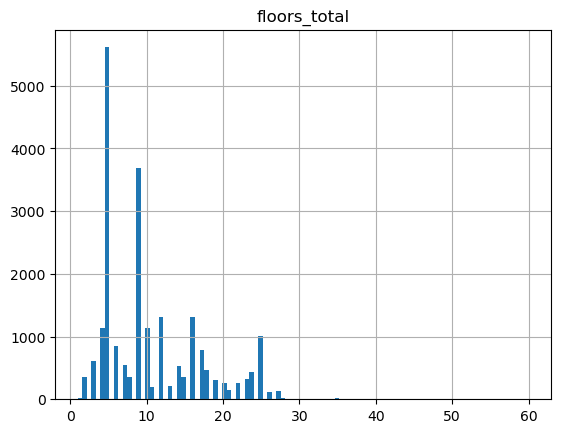

In [74]:
data.hist('floor', bins=100)
data.hist('floors_total', bins=100)



In [75]:
display(data['floor'].median())
display(data['floors_total'].median())

4.0

9.0

In [76]:
display(data['floor'].mean())
display(data['floors_total'].mean())

5.835553187710886

10.596386077073344

Из первой гистограммы видно: большая часть этажей - средние. Из отстальных гистограмм мы видим, что первые пять этажей преобладают, так как эти этажи есть как в пятиэтажках, так и во всех домах большей высотности. На графике `floors_total` отчетливо видны пятиэтажки и девятиэтажки как два пика. Скорее всего, жилье продается в большинстве своем далеко не новое - если район спальный, то хрущевки, панельки. В высотных домах нет какого-то одного пика, число этажей сильно варьируется. Малоэтажное строительство представлено тысячей-двумя вариантов - и здесь же, наверняка, все наиболее дорогие предложения вроде частных домов.


array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

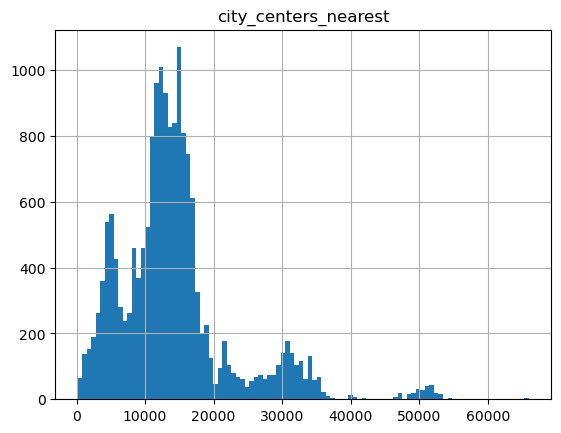

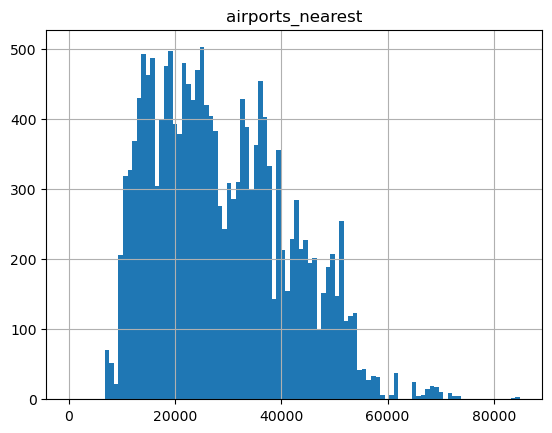

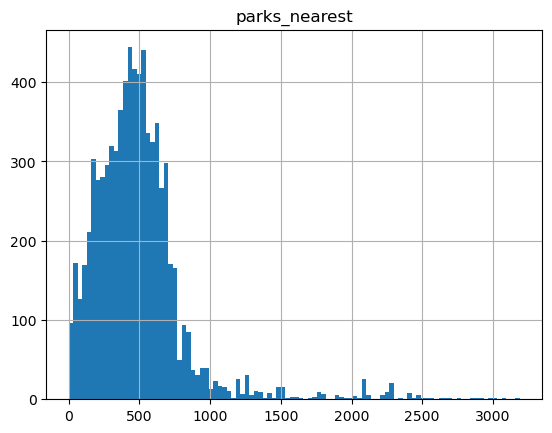

In [77]:
data.hist('city_centers_nearest',bins=100)
data.hist('airports_nearest',bins=100)
data.hist('parks_nearest', bins=100)


In [78]:
display(data['city_centers_nearest'].median())
display(data['airports_nearest'].median())
display(data['parks_nearest'].median())

13114.0

26786.0

455.0

In [79]:
display(data['city_centers_nearest'].mean())
display(data['airports_nearest'].mean())
display(data['parks_nearest'].mean())

14243.390633130963

28785.958494934875

490.142578125

Гистограмма с аэропортами широко разбросана, значит расстояния до них могут быть самыми разными, большинство в промежутке от 5 до 55 км. До центра города чаще всего 10-17 км, медиана и среднее совпадают с этим наблюдением. Значит, скорее всего, это спальные районы Петербурга, возможно, ближайшая пригородная зона. Еще есть скопление около 5 км от центра - возможно, это какие-то другие города поменьше, где все близко расположено. Здесь же жилой фонд в центре Питера.

Парки, как я уже заметила при обзоре данных, пишут только если они становятся главным конкурентным преимуществом квартир - то есть если они в радиусе километра. Здесь пик на 500 метрах.

<AxesSubplot:xlabel='weekday', ylabel='month'>

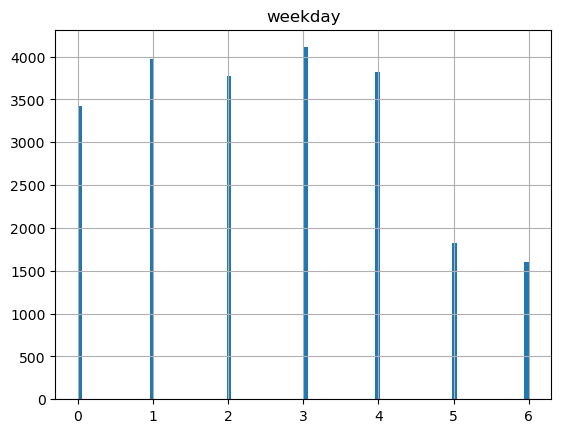

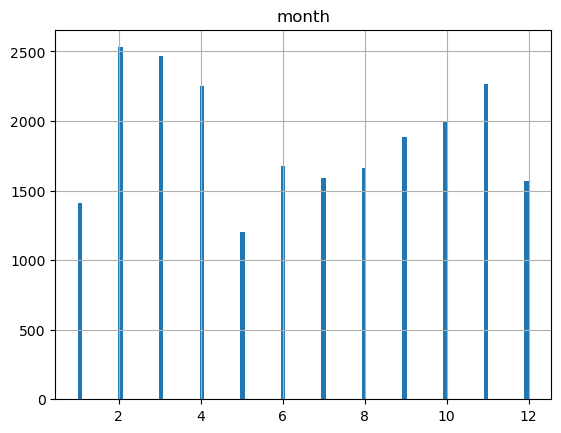

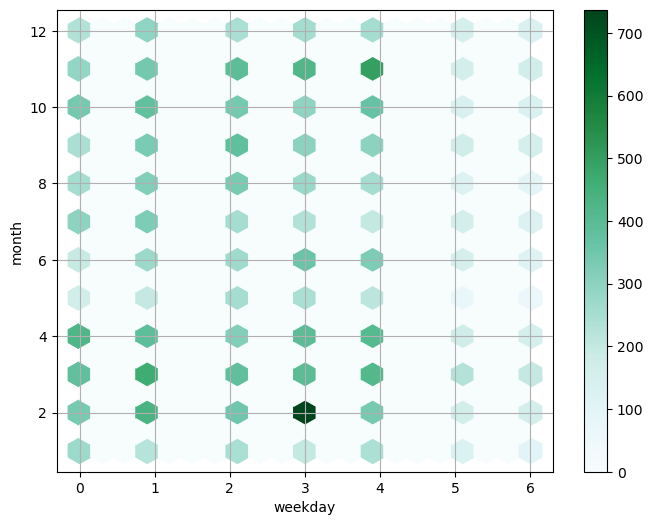

In [80]:
data.hist('weekday', bins=100)
data.hist('month', bins=100)
data.plot(x='weekday', y='month', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)  



In [81]:
display(data['weekday'].value_counts())
display(data['month'].value_counts())
display(len(data.loc[(data['month']==3) & (data['weekday']==3)]))
display(len(data.loc[(data['month']==2) & (data['weekday']==3)]))


3    4109
1    3971
4    3824
2    3768
0    3423
5    1824
6    1605
Name: weekday, dtype: int64

2     2530
3     2466
11    2269
4     2254
10    1995
9     1886
6     1678
8     1664
7     1592
12    1572
1     1413
5     1205
Name: month, dtype: int64

396

737

Интересный пик мы наблюдаем по четвергам февраля. Вероятно, это один какой-то четверг. Возможно, выброс. Он выводит четверги и феврали в лидеры по количеству. Мы также сравнили четверг в феврале с четвергом в марте - получилось 744 против 405. 

В целом, очень хорошо виден недельный и годовой ритм рынка - в выходные сделок мало, как и в летние месяцы, и в канун Нового года + январь за счет выпадающей первой декады. Сказывается режим работы учреждений и риелторов.  Пики приходятся на октябрь-ноябрь и с февраля по апрель.



В целом, в графиках нет необъяснимых пиков, они все так или иначе напоминают кривую нормального распределения - но есть величины дискретные, вроде типа этажа(если расположить в другом порядке), или годов,месяцев и дней недели, там , возможно, распределение Пуассона. Цены же обладают ярко выраженным скошенным распределением, скошенность вправо.


### Скорость продажи квартир
Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

    Постройте гистограмму.
    Посчитайте среднее и медиану.
    В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

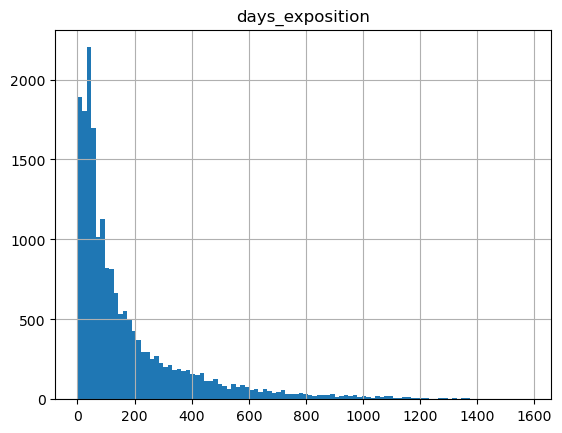

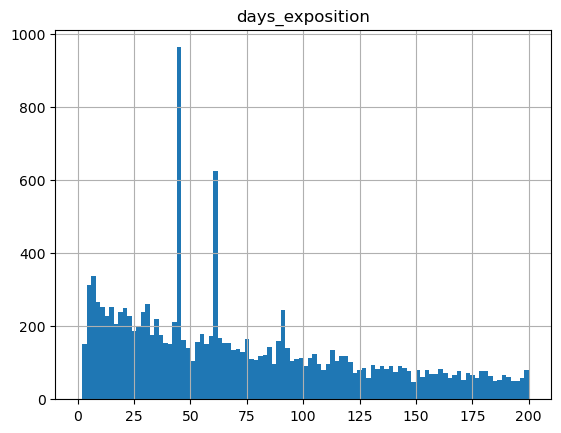

In [82]:
data.hist('days_exposition', bins=100)
data.hist('days_exposition', bins=100, range=(0,200))


In [83]:
display(data['days_exposition'].mean())
display(data['days_exposition'].median())


180.9011034128817

96.0

count    19485.000000
mean       180.901103
std        219.335854
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

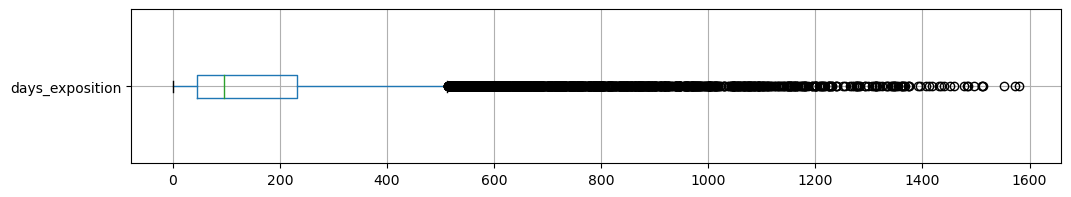

In [84]:
data.boxplot(column='days_exposition', vert=False, figsize=(12,2))
data['days_exposition'].describe()


Мы видим правильной формы убывающую кривую, а при ближайшем рассмотрении - пики значений от 40 до 50 дней и около 60 дней. При этом она сильно скошена вправо, поэтому медиана и тем более среднее намного выше пика частотности. График "Ящик с усами" подтверждает это, а описание дает нам точные цифры квартилей: 25% квартир продали за первые 45 дней, 75% - за 232 дня.

Можно сделать вывод, что половина квартир продается за первые 95 дней, а если не продали - то будут продаваться долго, возможно, пару лет (максимум - 1580 дней > 4 лет). Как горячие пирожки расхватывают обычно типовые предложения, а квартиры с особенностями продают дольше. Но это просто расхожее мнение, а что влияет на самом деле, увидим дальше.


Также мы можем определить примерные границы нормы и выделить необычно быстрые и медленные продажи. В норму усов попадает полтора межквартильных размаха: значит, нижняя граница нормы упирается в ноль (232-45=187 - межквартильный размах, 45-187*1.5 = 45-280.5 = -235.5), а верхняя = 232(третий квартиль) плюс 187*1.5, то есть 232+280.5 = 512.5.
    Но на практике мгновенные продажи - все же редкость, поэтому можем посчитать, например, сколько было продаж в первую неделю после появления объявления на ресурсе, все же такая шустрость может быть нехорошего происхождения, поэтому посчитаем слишком быстрыми продажи, которые произошли за первую неделю жизни объявления:


In [86]:
display('Быстрые продажи:', data[data['days_exposition']<=45.0]['days_exposition'].count())
display('Необычно медленные продажи:', data[data['days_exposition']>=232.0]['days_exposition'].count())


'Быстрые продажи:'

4827

'Необычно медленные продажи:'

4874

### Факторы, влияющие на стоимость квартиры
Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:

    общей площади;
    жилой площади;
    площади кухни;
    количества комнат;
    этажа, на котором расположена квартира (первый, последний, другой);
    даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

Строим сводную таблицу, по ней график и описание с округление до понятных чисел без `е` для каждой пары параметров.

,last_price
count,1976.0
mean,11192949.0
std,15209105.0
min,690000.0
25%,4051620.0
50%,6695417.0
75%,12862002.0
max,245000000.0


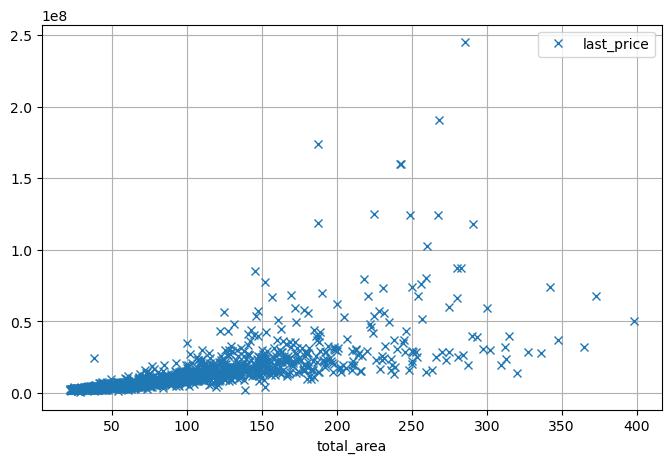

In [87]:
data.pivot_table(index='total_area',values='last_price',aggfunc='mean').plot(grid=True, style='x', figsize=(8,5))
round(data.pivot_table(index='total_area',values='last_price',aggfunc='mean').describe())


"Метель" задувает вправо на  значительную площадь. То есть в квартирах небольшой площади цены в куче, средние по рынку, а чем площадь больше, тем больше "снежинок" улетает куда-то вверх, к десяткам миллионов. При этом часть цен на большие площади остается внизу. Зависимость есть, положительная.


Попробуем посчитать корреляцию:


In [88]:
round(data['total_area'].corr(data['last_price']),2)

0.67

Корреляция довольно сильная. Теперь посмотрим на жилую площадь:

,last_price
count,2149.0
mean,10529712.0
std,13086610.0
min,450000.0
25%,4300000.0
50%,6493529.0
75%,11668067.0
max,245000000.0


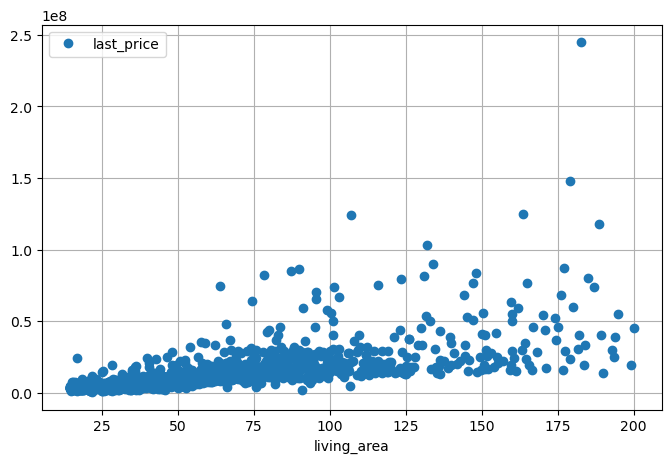

In [89]:
data.pivot_table(index='living_area',values='last_price',aggfunc='mean').plot(grid=True, style='o', figsize=(8, 5))
round(data.pivot_table(index='living_area',values='last_price',aggfunc='mean').describe())

По жилой площади картина такая же.

Корреляция - тоже есть:


In [90]:
round(data['living_area'].corr(data['last_price']),2)

0.6

,last_price
count,1410.0
mean,8393068.0
std,9619826.0
min,12190.0
25%,3796083.0
50%,5352500.0
75%,9627231.0
max,126000000.0


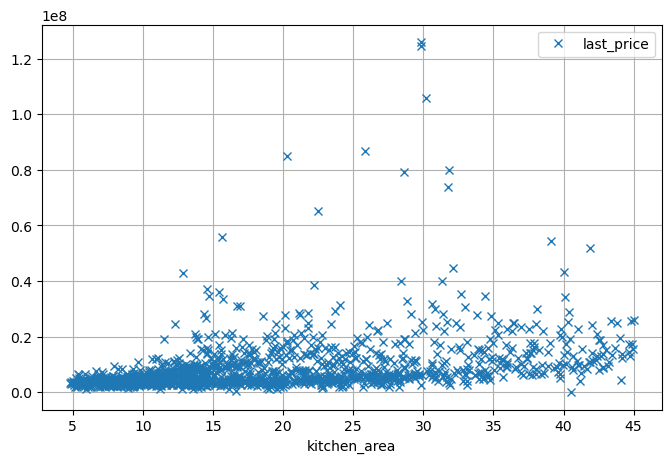

In [91]:
data.pivot_table(index='kitchen_area',values='last_price',aggfunc='mean').plot(grid=True, style='x', figsize=(8, 5))
round(data.pivot_table(index='kitchen_area',values='last_price',aggfunc='mean').describe())

По кухням до 12 кв.м. цены кучные, а с 15 - кто во что горазд. Трудно увидеть закономерности, тем более где-то затесалась почти бесплатная квартира с 40-метровой кухней, а где-то за 30-метровую просят 126 млн.


Корреляция (на всякий случай):


In [92]:
round(data['kitchen_area'].corr(data['last_price']),2)

0.38

Полезно проверять - корреляция есть, но слабее предыдущих.

,last_price
count,14.0
mean,19224876.0
std,10322775.0
min,3142827.0
25%,9032485.0
50%,24375385.0
75%,28272964.0
max,28836250.0


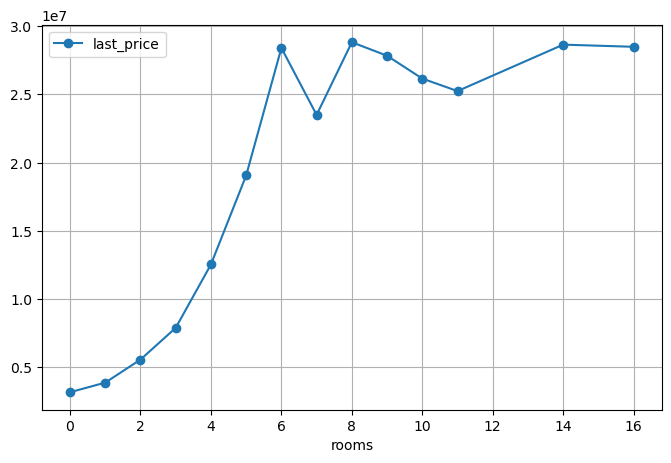

In [93]:
data.pivot_table(index='rooms',values='last_price',aggfunc='mean').plot(grid=True, style='o-', figsize=(8, 5))
round(data.pivot_table(index='rooms',values='last_price',aggfunc='mean').describe())


Какая яркая кривая, какой взлет! Зависимость налицо. Больше комнат - элитнее жилье - цена до небес. Причем в элитном цены плюс-минус ровные за разное количество комнат. Наибольшая разница в ценах наблюдается в середине диапазона комнат - от 3 до 6 комнат, но зависимость наблюдается с самого начала кривой, просто с более низкими ценами.



Считаем корреляцию - она тоже есть:


In [94]:
round(data['rooms'].corr(data['last_price']),2)

0.4

,last_price
count,3.0
mean,5810190.0
std,962440.0
min,4705214.0
25%,5482563.0
50%,6259912.0
75%,6362679.0
max,6465446.0


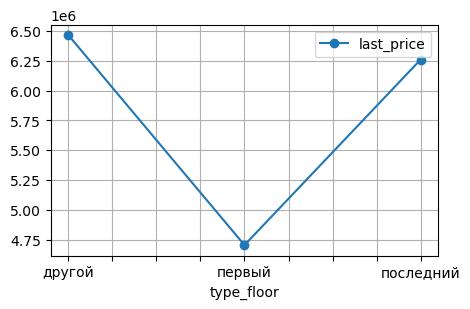

In [95]:
data.pivot_table(index='type_floor',values='last_price',aggfunc='mean').plot(grid=True, style='o-', figsize=(5,3))
round(data.pivot_table(index='type_floor',values='last_price',aggfunc='mean').describe())


Тоже интересное соотношение: первый этаж в среднем стоит 4,7 млн, А вот последний и другой различаются не сильно, в пределах 200 тысяч. Зависимость тоже очевидна - первый этаж стоит заметно дешевле при прочих равных.

,last_price
count,1484.0
mean,6356190.0
std,4589942.0
min,1150000.0
25%,4843620.0
50%,5673371.0
75%,6824009.0
max,142167000.0


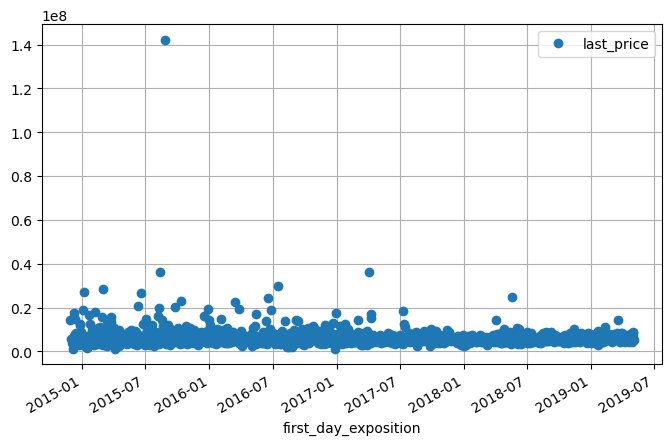

In [96]:
data.pivot_table(index='first_day_exposition',values='last_price',aggfunc='mean').plot(grid=True, style='o', figsize=(8, 5))
round(data.pivot_table(index='first_day_exposition',values='last_price',aggfunc='mean').describe())


Данные у нас с 27.11.2014 с 3.05.2019, исчисление здесь в сотнях миллионов по оси ординат. Единственная продажа за максимальные 142 млн не дает рассмотреть как следует основную массу продаж. Ограничим верх цены и построим заново:

<AxesSubplot:xlabel='first_day_exposition'>

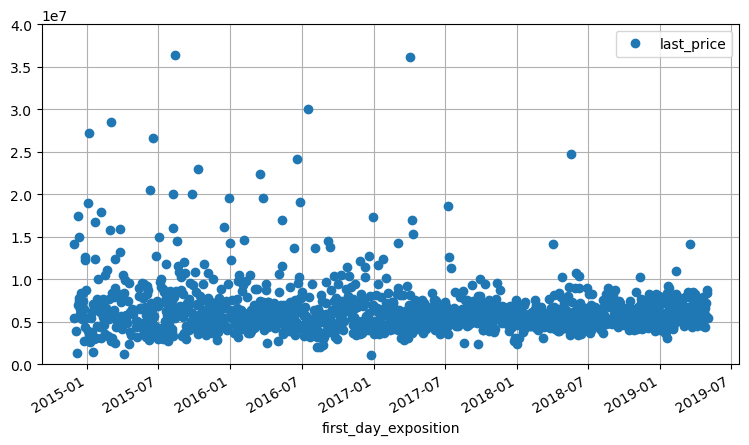

In [97]:
data.pivot_table(index='first_day_exposition',values='last_price',aggfunc='mean').plot(grid=True, style='o', figsize=(9, 5), ylim=(0,40000000))


Чем дальше, тем кучнее цены, со временем нижний край немного поднимается, сверху разброс все меньше. По графику видно, что цены к концу периода сформировали диапазон от 4 до 9 млн. рублей. Однако, в скоплении типовых квартир не очень видно, как изменялась средняя цена, поэтому построим еще графики отдельно по колонкам с годом, месяцем и днем. График по колонке `year`:


<AxesSubplot:xlabel='year'>

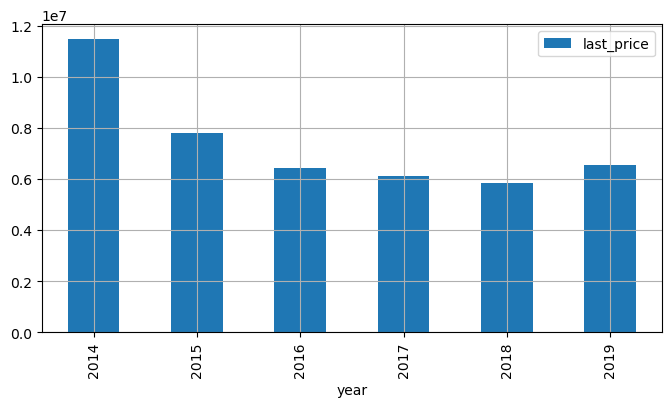

In [98]:
data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(kind='bar', grid=True,  figsize=(8,4))


Результат: средняя цена 2014 года намного выше остальных. Вероятно, это связано с большим количеством дорогих предложений, которые мы видели на первых графиках - они подтянули среднее к себе. Проверим по медиане:

<AxesSubplot:xlabel='year'>

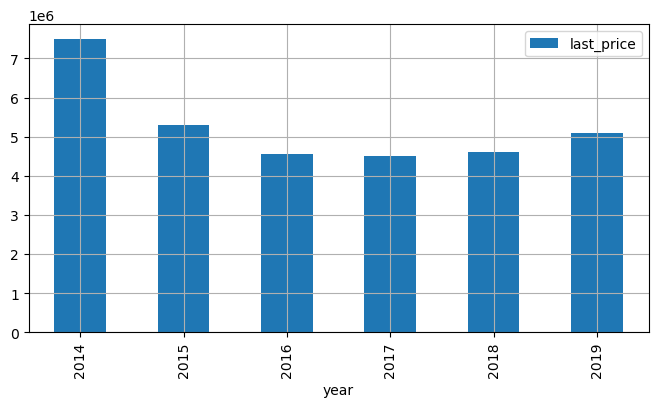

In [99]:
(data
    .pivot_table(index='year',values='last_price',aggfunc='median')
    .plot(kind='bar', grid=True,  figsize=(8,4))
)


Цены все равно выше в 2014.

Итак, мы заметили прямую зависимость цены квартиры от площади (общей и жилой), от количества комнат и категории этажей. Также видна история цены, где тоже видны изменения в сторону концентрации цены вокруг средних значений, средняя цена снизилась по сравнению с 2014 годом, в конце периода наметился рост.


Посмотрим также на соотношение месяца и цены и дня недели и цены:


<AxesSubplot:xlabel='weekday'>

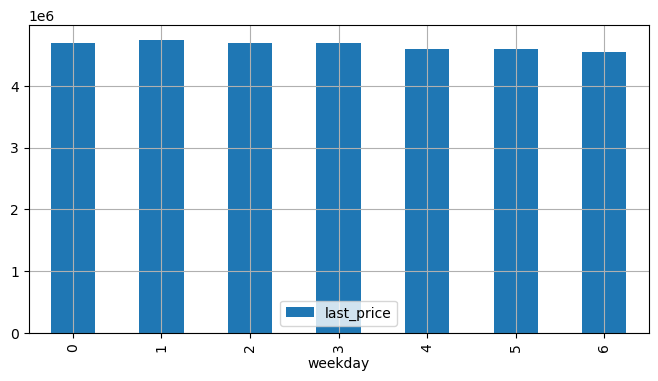

In [100]:
data.pivot_table(index='weekday',values='last_price',aggfunc='median').plot(kind='bar', grid=True,  figsize=(8,4))


<AxesSubplot:xlabel='month'>

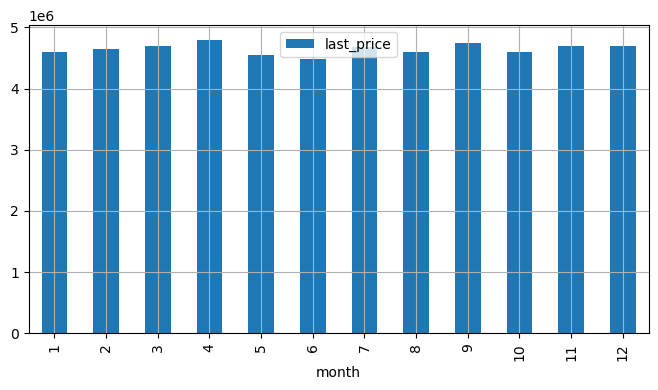

In [101]:
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(kind='bar', grid=True,  figsize=(8,4))



Визуально в двух последних столбчатых диаграммах столбцы тоже почти ровные. Годы информативнее, видна общая тенденция рынка, яркие события вроде падения цен после 2014 года. Хотелось бы взглянуть на диаграмму последних трех лет.


### Средняя цена метра

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

У нас есть столбец с очищенными от приставок названиями населенных пунктов - `locality_only`. Построим пивот-таблицу, учитывающую значения `locality_only` и `price_for_one` - и посчитаем среднюю цену за метр по населенным пунктам. Отсортируем список с конца и выберем первые 10 строк.

In [102]:
top = (
    data['locality_only'].value_counts()
    .head(10)
)
display(top)

Санкт-Петербург    14991
 Мурино              483
 Шушары              409
Всеволожск           375
Пушкин               356
Колпино              333
Гатчина              298
 Парголово           285
 Кудрово             283
Выборг               228
Name: locality_only, dtype: int64

In [103]:
top_10 = (
    data.pivot_table(index='locality_name', values='price_for_one',aggfunc='count')
    .reset_index()
    .sort_values('price_for_one', ascending=False)
    .head(10)
)
display(top_10)

,locality_name,price_for_one
33,Санкт-Петербург,14991
218,поселок Мурино,483
297,поселок Шушары,409
3,Всеволожск,375
32,Пушкин,356
13,Колпино,333
6,Гатчина,298
229,поселок Парголово,285
79,деревня Кудрово,283
4,Выборг,228


Мы видим чарт по количеству объявлений, с большим отрывом по количеству объявлений лидирует Питер, а замыкает первую десятку Выборг. Посмотрим цены в этих двух городах:

In [104]:
piter = data.query('locality_only=="Санкт-Петербург"')
piter_price = round(piter['price_for_one'].mean())
display(piter_price)


113207

In [105]:
murino = data.query('locality_only=="Мурино"')
murino_price = round(murino['price_for_one'].mean())
display(murino_price)


92364

In [106]:
shushary = data.query('locality_name=="поселок Шушары"')
shushary_price = round(shushary['price_for_one'].mean())
display(shushary_price)


77379

In [107]:
vsevolgsk = data.query('locality_only=="Всеволожск"')
vsevolgsk_price = round(vsevolgsk['price_for_one'].mean())
display(vsevolgsk_price)


68714

In [108]:
pushkin = data.query('locality_only=="Пушкин"')
pushkin_price = round(pushkin['price_for_one'].mean())
display(pushkin_price)


102661

In [109]:
kolpino = data.query('locality_only=="Колпино"')
kolpino_price = round(kolpino['price_for_one'].mean())
display(kolpino_price)


75400

In [110]:
gatchina = data.query('locality_only=="Гатчина"')
gatchina_price = round(gatchina['price_for_one'].mean())
display(gatchina_price)


68919

In [111]:
pargolovo = data.query('locality_name=="поселок Парголово"')
pargolovo_price = round(pargolovo['price_for_one'].mean())
display(pargolovo_price)


88866

In [112]:
kudrovo = data.query('locality_only=="Кудрово"')
kudrovo_price = round(kudrovo['price_for_one'].mean())
display(kudrovo_price)


99787

In [113]:
vyborg = data.query('locality_only=="Выборг"')
vyborg_price = round(vyborg['price_for_one'].mean())
display(vyborg_price)

57794


Мы можем видеть, что места по ценам среди самых популярных населенных пунктов распределились следующим образом:

    - 1 место: Санкт-Петербург, 113207 рублей за метр в среднем;
    - 2 место: Пушкин, 102661;
    - 3 место: Кудрово, 99787;
    - 4 место: Мурино, 92364;
    - 5 место: Парголово, 88866;
    - 6 место: Шушары, 77379; 
    - 7 место: Колпино, 75400;
    - 8 место: Гатчина, 68919;
    - 9 место: Всеволжск, 68714;
    - 10 место: Выборг, 57794 рублей за метр.

Средние цены в самых частотных населенных пунктах - 1 место занимает Петербург со средней ценой за метр = 113207, а замыкает десятку первых Выборг с демократичными 57794. Разброс приличный.

In [114]:
outsiders_10 = (
    data.pivot_table(index='locality_name',values='price_for_one',aggfunc='count')
    .sort_values('price_for_one')
    .head(10)
)
display(outsiders_10)

,price_for_one
locality_name,
село Шум,1
деревня Пикколово,1
деревня Пижма,1
поселок Коммунары,1
деревня Пельгора,1
поселок Кондратьево,1
деревня Новолисино,1
деревня Нижняя,1
деревня Нижние Осельки,1


Самые скромные цены за метр в этих населенных пунктах. Названия не на слуху, поэтому пришлось взять столбец в приставками. Деревни и поселки. 

### Удаляемся от центра: цена километра
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

Нам нужны столбцы `locality_only`, `city_сenters_nearest_km` и `price_for_one`. Делаем срез по Питеру методом guery(), построим сводную таблицу и график по ней:
. 

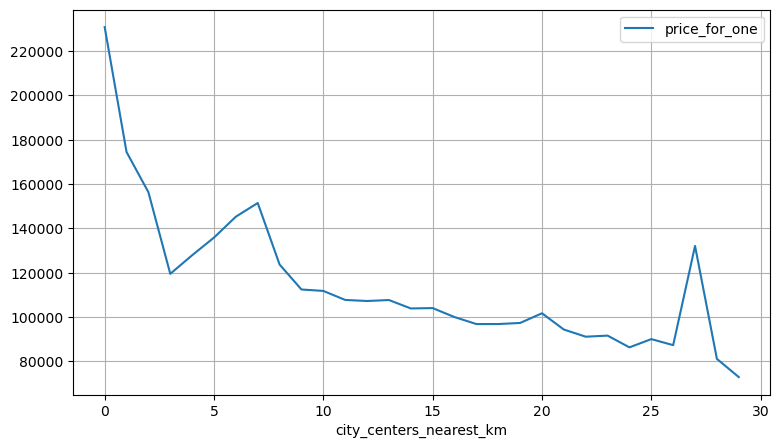

In [115]:
price_km = (
    data
    .query('locality_only == "Санкт-Петербург"')
    .pivot_table(index='city_сenters_nearest_km',values='price_for_one',aggfunc='mean')
    .sort_values(by='city_сenters_nearest_km')
    .plot(grid=True, figsize=(9,5))
)


Мы видим, как цена за метр стремительно уменьшается по мере удаления от центра Петербурга в пределах 5 км. Вероятно, там не так много продаваемого жилья, а вот начиная с 10 км начинается конкуренция и цена теперь плавно снижается. Правда, есть и тут неожиданный пик. Расстояние приличное - около 27 км - возможно, это цена за метр в центре пригородов на таком расстоянии, или местное Рублевское шоссе.

## Вывод исследования

Дальше мы провели исследовательский анализ: изучили получившуюся таблицу, построили гистограммы для некоторых столбцов, описали их и понаблюдали, как быстро происходили продажи, когда бывали затишья, а когда, наоборот, происходило много сделок. Выяснили, что влияет на цену жилья. Это общая и жилая площадь, тип этажа (дешевле первый и последний), количество комнат, престижность района/города и удаленность от центра Петербурга - узнали цену каждого километра на пути к сердцу города. Узнали, какие населенные пункты наиболее популярны, и каковы средние цены на жилье там. 

Также мы потренировались в чисто технических моментах - повторили, как строить сводные таблицы и делать логическую индексацию, написали циклы с условиями, много сортировали, делали срезы. Увидели, что не все пропуски поддаются заполнению и иногда лучше не трогать, чем разбираться со взбесившимися пиками медиан (это осталось за кадром). Освоили, наконец, Jupiter хотя бы на базовом уровне. А также закрепили навыки построения различных графиков и чтение данных по ним. Наглядность и вправду позволяет лучше и быстрее ориентироваться. 


Также мы можем сделать вывод, какого жилья больше всего на рынке: это обычное типовое жилье на 1-2 комнаты, с маленькой кухней, в пятиэтажных и девятиэтажных домах где-то в спальных районах Питера и пригородов. В тех ценах цена за метр там была в пределах 100000, в то время как в центре Питера или в отдельных предложениях с большой площадью цена может быть гораздо больше. Есть и совсем дешевые варианты - но в сельской местности и, наверняка, без особых удобств. Мы видели динамику цен и немного понастальгировали. В целом, не было каких-то совсем удивительных вещей, но было много маленьких особенностей, о которых обыватель может и не знать. Но они есть в данных и их можно увидеть и попытаться разгадать.